**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . 

The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content**

It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

[Data here](https://www.kaggle.com/kazanova/sentiment140?select=training.1600000.processed.noemoticon.csv)

In [13]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [14]:
data = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Renaming the Columns**

In [20]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()
print(data.shape[0])

1599999


**Trimming the data**

In [21]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [22]:
data.head()
print(len(data))

1599999


**Splitting the data**

Since our data set contains more than 1.6 million tweets let's take just a part of the data.

In [25]:
positive_data = data[data.target==4].iloc[:25000,:]
print(positive_data.shape)
negative_data = data[data.target==0].iloc[:1000,:]
print(negative_data.shape)

(25000, 2)
(1000, 2)


Now our data contains 26K rows. 25K data are positive and 1k data are negative

In [26]:
data = pd.concat([positive_data,negative_data],axis = 0)
print(data.shape)
data.head()

(26000, 2)


,target,TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone


**Data cleaning**

Removing data handles

In [27]:
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone


Removing Links

In [28]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone


Removing Punctuations and special characters

In [29]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health UandPets u guys r the best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight Cant wait GIRL TALK
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",DaRealSunisaKim Thanks for the Twitter add Sunisa I got to meet you once at a HIN show here in the DC area and you were a sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",Being sick can be really cheap when it hurts too much to eat real food Plus your friends make you soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn he has that effect on everyone


Removing Stopwords

In [30]:
stopwords=nltk.corpus.stopwords.words('english')

In [31]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [32]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting one besties tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thanks twitter add sunisa got meet hin show dc area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick really cheap hurts much eat real food plus friends make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


**Tokenization and Normalization**

In [33]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpets, u, guys, r, best]"
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meeting, one, besties, tonight, cant, wait, girl, talk]"
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thanks, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, really, cheap, hurts, much, eat, real, food, plus, friends, make, soup]"
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyone]"


In [34]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpet, u, guy, r, best]"
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meet, one, besti, tonight, cant, wait, girl, talk]"
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thank, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, realli, cheap, hurt, much, eat, real, food, plu, friend, make, soup]"
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyon]"


**Reform the tokens**

In [35]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet u guy r best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meet one besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter add sunisa got meet hin show dc area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much eat real food plu friend make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


**Removing words with less than 3 letters**

In [36]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,meet besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter sunisa meet show area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much real food friend make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


# **Data Visualization**

Let's see the most frequent words with the WordCloud

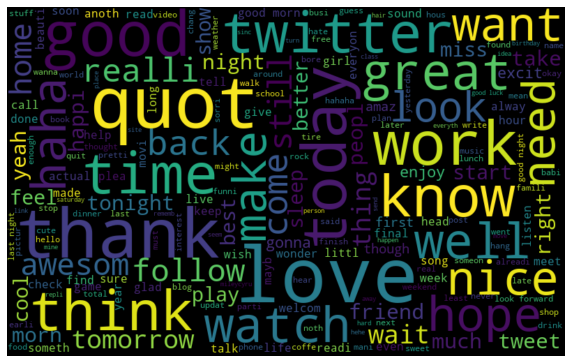

In [37]:
all_words = ' '.join([text for text in data['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Let's see positive WordCloud

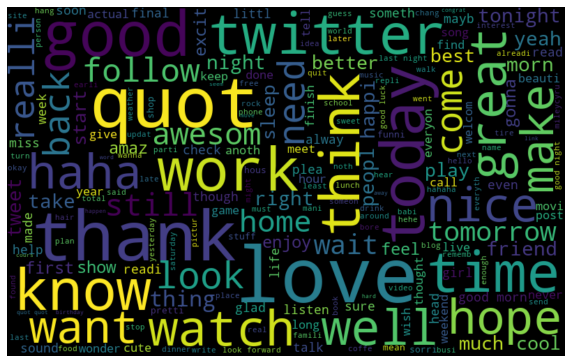

In [38]:
positive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 4]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Let's see Negative WordCloud

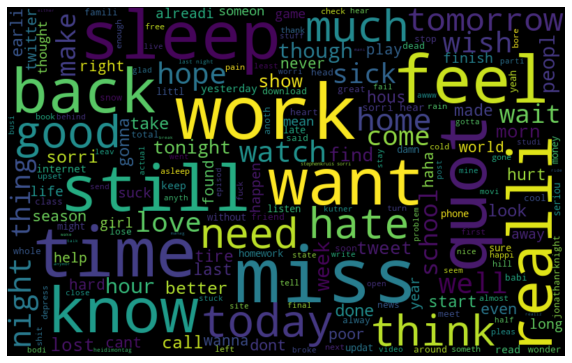

In [39]:
depressive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Model Building**

In [40]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [41]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(26000, 27119)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

# **Model training**

**XG Boost**

In [49]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))
XGB = accuracy_score(prediction_xgb,y_test)

[07:00:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9605769230769231


**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.9592307692307692


**SVM**

In [47]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.9619230769230769


**Logistic Regression**

In [48]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.9628846153846153


<BarContainer object of 4 artists>

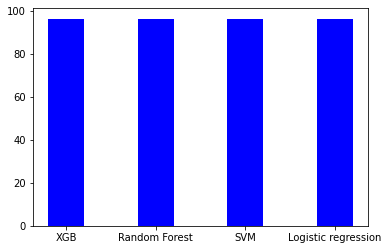

In [60]:
accuracies = [96.05, 95.92, 96.19, 96.28]
algos = ["XGB", "Random Forest", "SVM", "Logistic regression"]

plt.bar(algos, accuracies, color ='blue',
        width = 0.4)
